In [683]:
# Import Library

import numpy as np # untuk Menyimpan Multidimentional Array
import pandas as pd # untuk memanipulasi data > CSV
import matplotlib.pyplot as plt # untuk Memvisualisasikan Data
import seaborn as sns # untuk membuat visualisasi statistik
import sklearn # untuk Machine Learning; termasuk Naive Bayes, Decission Tree, Regresi Linear

In [684]:
#import datasets
data = 'Jan_2019_ontime.csv'
#membaca datasets
df = pd.read_csv(data)

In [685]:
# menampilkan dimensi dataset (data,kolom)

df.shape

(583985, 19)

In [686]:
# menampilkan data teratas

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [687]:
# melihat ringkasan dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN                 583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int64  
 10  DEST                   583985 non-null  object 
 11  DEP_TIME               567633 non-null  float64
 12  DEP_DEL15              567630 non-null  float64
 13  DEP_TIME_BLK           583985 non-null  object 
 14  ARR_TIME               566924 non-nu

In [688]:
# mencari variable categorical

categorical = [var for var in df.columns if df[var].dtype=='O']

print('Terdapat {} variable categorical\n'.format(len(categorical)))

print('variable categorical tersebut terdiri dari :\n\n', categorical)

Terdapat 6 variable categorical

variable categorical tersebut terdiri dari :

 ['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']


In [689]:
# mencari jumlah data tak berisi dari setiap variable 
df.isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [690]:
# menyeleksi atribut yang tidak digunakan
col_names = ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 
            'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST', 'DEP_TIME',
            'DEP_TIME_BLK', 'ARR_TIME',
            'DIVERTED', 'DISTANCE'
]
dataframe = df.drop(columns = col_names) # drop kolom yang sudah didevinisikan ke dalam variable col_names
dataframe.head() # cek hasil drop

,DEP_DEL15,ARR_DEL15,CANCELLED
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0


In [691]:
# cek kembali jumlah data tak berisi dari setiap variable setelah dropping atribut

dataframe.isnull().sum()

DEP_DEL15    16355
ARR_DEL15    18022
CANCELLED        0
dtype: int64

In [692]:
array = dataframe.values #membuat array
X = array [:, 0:1] #mendefinisikan index ke 0 dan 1 menjadi X
Y = array [:, 2] #mendefinisikan index ke 2 menjadi Y
array

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [693]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [694]:
# setting object untuk proses encoding data DEP_DEL15 (kolom index ke-0) dengan one hot encoder
ct = ColumnTransformer([("DEP_DEL15", OneHotEncoder(), [0])], remainder = 'passthrough')
# proses encoding terhadap X
X = ct.fit_transform(X)

In [695]:
# setting object untuk proses encoding data ARR_DEL15 (kolom index ke-0) dengan one hot encoder
ct = ColumnTransformer([("ARR_DEL15", OneHotEncoder(), [0])], remainder = 'passthrough')
# proses encoding terhadap X
X = ct.fit_transform(X)

In [696]:
#Split Validation
from sklearn.model_selection import train_test_split #library pembagi dataset menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #test size adalah data yg di test
x_test
#test size adalah data yg diuji. 0.2 = 20%. jadi yang dijadikan data test adalah 20% dari datasets. sisanya menjadi data train
#Pembagian data test dan data train tidak paten namun data sientist menyarankan untuk data test 20-30%, data train 60,70,80%

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [697]:
#membuat model naive bayes menggunakan GaussianNB

from sklearn.naive_bayes import GaussianNB #import naive bayes tipe Gaussian
model = GaussianNB() # membuat moodel naive bayes dengan nama model
model.fit(x_train, y_train) #memasukkan data training pada fungsi klasifikasi naive bayes

GaussianNB()

In [698]:
#membuat model klasifikasi

nbtrain = model.fit(x_train, y_train)
nbtrain.class_count_

array([453797.,  13391.])

In [699]:
# memprediksi data test

y_pred = nbtrain.predict(x_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [700]:
# menghitung probabilitas hasil prediksi

nbtrain.predict_proba(x_test)

array([[1.00000000e+00, 7.90924479e-56],
       [1.00000000e+00, 4.83341308e-31],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 7.90924479e-56],
       [1.00000000e+00, 7.90924479e-56],
       [1.00000000e+00, 7.90924479e-56]])

In [701]:
#cek akurasi

from sklearn.metrics import accuracy_score #import library untuk score akurasi
ac = accuracy_score(y_test, y_pred) #membandingkan y_test dan y_train untuk akurasi
ac

0.9992722415815475

In [702]:
#membuat confution matrix

from sklearn.metrics import confusion_matrix #import library untuk confution matrix
cm = confusion_matrix(y_test, y_pred) #membandingkan y_test dan y_train untuk confution matrix

<AxesSubplot: >

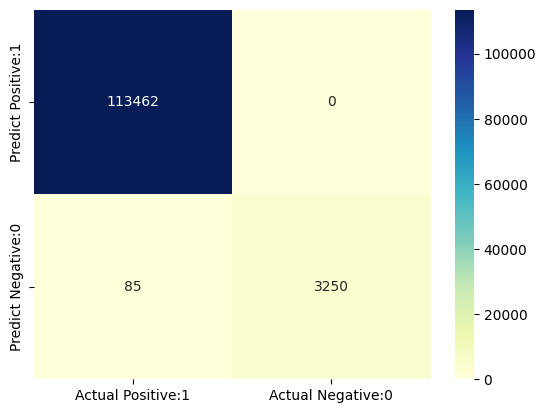

In [703]:
# mendefinisikan confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
# membuat visualisasi confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')